In [8]:
from __future__ import print_function
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()  #內建數據庫 iris花 ,還有很多其他的數據庫,很有用~
iris_X = iris.data
iris_y = iris.target

##print(iris_X[:2, :])
##print(iris_y)

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.3)

##print(y_train)
##print(y_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)  
print(knn.predict(X_test)) #預測值
print(y_test) #實際值


[2 0 2 1 1 0 1 1 2 1 2 2 2 0 0 0 0 0 0 0 1 2 1 1 2 0 2 2 1 2 0 1 2 0 2 0 0
 0 0 1 2 1 2 2 1]
[2 0 2 1 1 0 1 1 2 2 2 2 2 0 0 0 0 0 0 0 1 2 1 1 2 0 2 2 1 2 0 1 2 0 2 0 0
 0 0 1 2 1 2 2 1]


[ 30.00821269  25.0298606   30.5702317   28.60814055]
[ 24.   21.6  34.7  33.4]


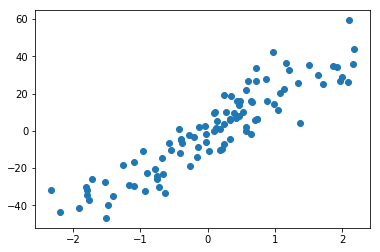

In [10]:
from __future__ import print_function
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

loaded_data = datasets.load_boston()  #數據庫裡面的boston房價data
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)

print(model.predict(data_X[:4, :]))
print(data_y[:4])
#看數據~不太準的話,需要調整參數來提高準確度
X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=10)
plt.scatter(X, y)
plt.show()

In [12]:
from __future__ import print_function
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)

print(model.predict(data_X[:4, :]))
print(model.coef_) #參數 y = ax + b 的 a
print(model.intercept_) #參數 b
print(model.get_params())
print(model.score(data_X, data_y)) # R^2 coefficient of determination

[ 30.00821269  25.0298606   30.5702317   28.60814055]
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
0.740607742865


[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


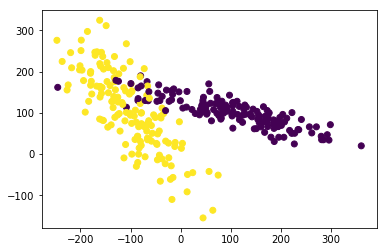

0.955555555556


In [20]:
from __future__ import print_function
from sklearn import preprocessing 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

a = np.array([[10, 2.7, 3.6],
             [-100, 5, -2],
             [120, 20, 40]], dtype=np.float64)
print(a)
print(preprocessing.scale(a)) #正規化normalization

X, y = make_classification(n_samples=300, n_features=2 , n_redundant=0, n_informative=2,
                           random_state=22, n_clusters_per_class=1, scale=100)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
X = preprocessing.scale(X)    # normalization step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf = SVC() #model
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.973684210526
[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333


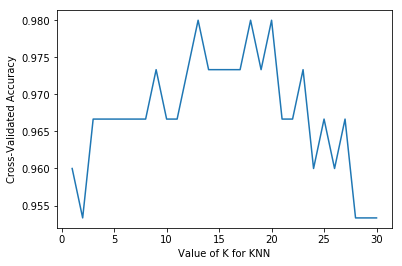

In [23]:
#交叉驗證
from __future__ import print_function
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

# test train split # 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5) #n_neighbors 考慮周邊5個值
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

# this is cross_val_score #
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy') #分成五組(cv=5)交叉驗證(同一堆數據,用相同比例分成五個不同的訓練與測試組)
print(scores)
print(scores.mean())

# this is how to use cross_val_score to choose model and configs #
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
#n_neighbors用不同值傳進去訓練看看
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)  #model 也可以換換不同model來學學看
##    loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error') # for regression 線性回歸
##    k_scores.append(loss.mean()) #誤差小的比較好
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # for classification
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
#k值1X較佳,更多不準可能是overfit

D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\sc

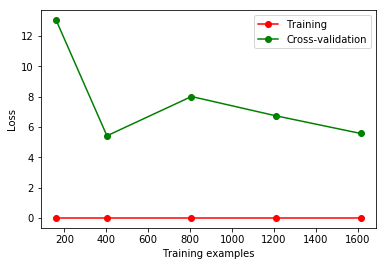

In [25]:
from __future__ import print_function
from sklearn.learning_curve import  learning_curve #可視化
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
train_sizes, train_loss, test_loss= learning_curve(
        SVC(gamma=0.01), X, y, cv=10, scoring='mean_squared_error',
        train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
#'method mean_squared_error' was renamed to 'neg_mean_squared_error' in version 0.18 and will be removed in 0.20.
train_loss_mean = -np.mean(train_loss, axis=1) #loss 是負的 故加個負號
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()
#當測試資料跟訓練資料到某個程度開始越來越不準,就是overfit了

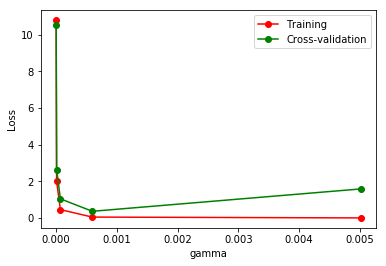

In [28]:
from __future__ import print_function
from sklearn.learning_curve import validation_curve #不是learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(
        SVC(), X, y, param_name='gamma', param_range=param_range, cv=10,
        scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()
#所以取值範圍大概取到 0.0006 超過會開始overfit

In [ ]:
from __future__ import print_function
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)
#保存的方式
# method 1: pickle
import pickle
# save
with open('save/clf.pickle', 'wb') as f:
    pickle.dump(clf, f)
# restore
with open('save/clf.pickle', 'rb') as f:
   clf2 = pickle.load(f)
   print(clf2.predict(X[0:1]))

# method 2: joblib
from sklearn.externals import joblib
# Save
joblib.dump(clf, 'save/clf.pkl')
# restore
clf3 = joblib.load('save/clf.pkl')
print(clf3.predict(X[0:1]))